In [1]:
# Author : Amir Shokri
# github link : https://github.com/amirshnll/dermatology
# dataset link : http://archive.ics.uci.edu/ml/datasets/Dermatology
# email : amirsh.nll@gmail.com

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv('dermatology_data.csv', header=None)

In [4]:
data = data.replace(to_replace="?", method='ffill')

In [5]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,34
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


In [6]:
properties = data[data.columns[:34]]
target = data[data.columns[34]]
scaler = MinMaxScaler()
scaled_x = scaler.fit_transform(properties)


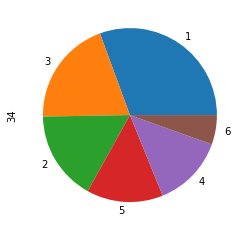

In [7]:
target.value_counts().plot.pie()

In [8]:
pca = PCA(n_components=15)
reduced_x = pca.fit_transform(scaled_x)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(reduced_x, target, test_size=0.3, random_state=0)

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [11]:
gnb = GaussianNB()
mlp = MLPClassifier(hidden_layer_sizes=(100, 100))
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier()
regressor = LogisticRegression()

In [12]:
gnb.fit(X_train, y_train)
y_predgnb = gnb.predict(X_test)

mlp.fit(X_train, y_train)
y_predmlp = mlp.predict(X_test)

knn.fit(X_train, y_train)
y_predknn = knn.predict(X_test)

dt.fit(X_train, y_train)
y_preddt = dt.predict(X_test)

regressor.fit(X_train, y_train)
y_predregressor = regressor.predict(X_test)

C:\Users\Amirshnll\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [13]:
print('gnb f1: ', f1_score(y_test, y_predgnb, average='micro'))
print('gnb accuracy: ', accuracy_score(y_test, y_predgnb))

print('mlp f1: ', f1_score(y_test, y_predmlp, average='micro'))
print('mlp accuracy: ', accuracy_score(y_test, y_predmlp))

print('knn f1: ', f1_score(y_test, y_predgnb, average='micro'))
print('knn accuracy: ', accuracy_score(y_test, y_predknn))

print('decision tree f1: ', f1_score(y_test, y_predgnb, average='micro'))
print('decision tree accuracy: ', accuracy_score(y_test, y_preddt))

print('logistic regression f1: ', f1_score(y_test, y_predgnb, average='micro'))
print('logistic regression accuracy: ', accuracy_score(y_test, y_predregressor))

gnb f1:  0.9727272727272728
gnb accuracy:  0.9727272727272728
mlp f1:  1.0
mlp accuracy:  1.0
knn f1:  0.9727272727272728
knn accuracy:  0.9818181818181818
decision tree f1:  0.9727272727272728
decision tree accuracy:  0.9090909090909091
logistic regression f1:  0.9727272727272728
logistic regression accuracy:  0.990909090909091
